In [ ]:
!pip install geomag numpy matplotlib


  Preparing metadata (setup.py) ... done
  Created wheel for geomag: filename=geomag-0.9.2015-py3-none-any.whl size=7820 sha256=2b54b4aa07c47859468a6766afc39395427f62646753dd70b79e68bb14eedd62
  Stored in directory: /root/.cache/pip/wheels/c9/4d/89/3a748c99eec1c626ecdcdd330bcf7c08276ad916122b7cbc50
Successfully built geomag


In [ ]:
def calculate_magnetic_field(lat, lon, alt):
    mag = geomag.GeoMag()
    current_date = datetime.datetime.now().date()
    field = mag.GeoMag(lat, lon, alt, time=current_date)
    print(dir(field))  # ดูว่ามีอะไรใน field บ้าง
    return {
        "declination": field.dec,  # มุมเบี่ยงเบน
        "total_intensity": field.ti,  # ความเข้มรวมของสนามแม่เหล็ก
    }


In [ ]:
def calculate_magnetic_field(lat, lon, alt):
    mag = geomag.GeoMag()
    current_date = datetime.datetime.now().date()
    field = mag.GeoMag(lat, lon, alt, time=current_date)
    return {
        "declination": field.dec,
        "horizontal_intensity": field.h,  # ความเข้มแนวนอน
        "vertical_intensity": field.z,    # ความเข้มแนวตั้ง
        "total_intensity": field.ti,
    }


In [ ]:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'alt', 'bh', 'bx', 'by', 'bz', 'dec', 'dip', 'lat', 'lon', 'ti', 'time']

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alt',
 'bh',
 'bx',
 'by',
 'bz',
 'dec',
 'dip',
 'lat',
 'lon',
 'ti',
 'time']

In [ ]:
from geomag import geomag
import datetime

# สร้างฟังก์ชันคำนวณสนามแม่เหล็ก
def calculate_magnetic_field(lat, lon, alt):
    mag = geomag.GeoMag()
    current_date = datetime.datetime.now().date()  # แปลงเป็น datetime.date
    field = mag.GeoMag(lat, lon, alt, time=current_date)
    # ตรวจสอบข้อมูลใน field
    print("Available attributes in field:", dir(field))
    # Accessing the correct components using their actual attribute names:
    return {
        "declination": field.dec,  # มุมเบี่ยงเบน
        "horizontal_intensity": field.bh,  # ความเข้มแนวนอน - Using 'bh' instead of 'h'
        "vertical_intensity": field.bz,    # ความเข้มแนวตั้ง - Using 'bz' instead of 'z'
        "total_intensity": field.ti,  # ความเข้มรวมของสนามแม่เหล็ก
    }

# กำหนดพิกัด (ตัวอย่างกรุงเทพ)
latitude = 13.7563
longitude = 100.5018
altitude = 0  # ความสูงจากระดับน้ำทะเล (เมตร)

# คำนวณและแสดงผล
magnetic_field = calculate_magnetic_field(latitude, longitude, altitude)
print("Magnetic Field at Current Location:")
print(f"Declination (degrees): {magnetic_field['declination']}")
print(f"Horizontal Intensity (nT): {magnetic_field['horizontal_intensity']}")
print(f"Vertical Intensity (nT): {magnetic_field['vertical_intensity']}")
print(f"Total Intensity (nT): {magnetic_field['total_intensity']}")

Available attributes in field: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'alt', 'bh', 'bx', 'by', 'bz', 'dec', 'dip', 'lat', 'lon', 'ti', 'time']
Magnetic Field at Current Location:
Declination (degrees): -0.5242073301421298
Horizontal Intensity (nT): 41023.49983438665
Vertical Intensity (nT): 12498.118393743236
Total Intensity (nT): 42885.084843637


# **Simulation Model**

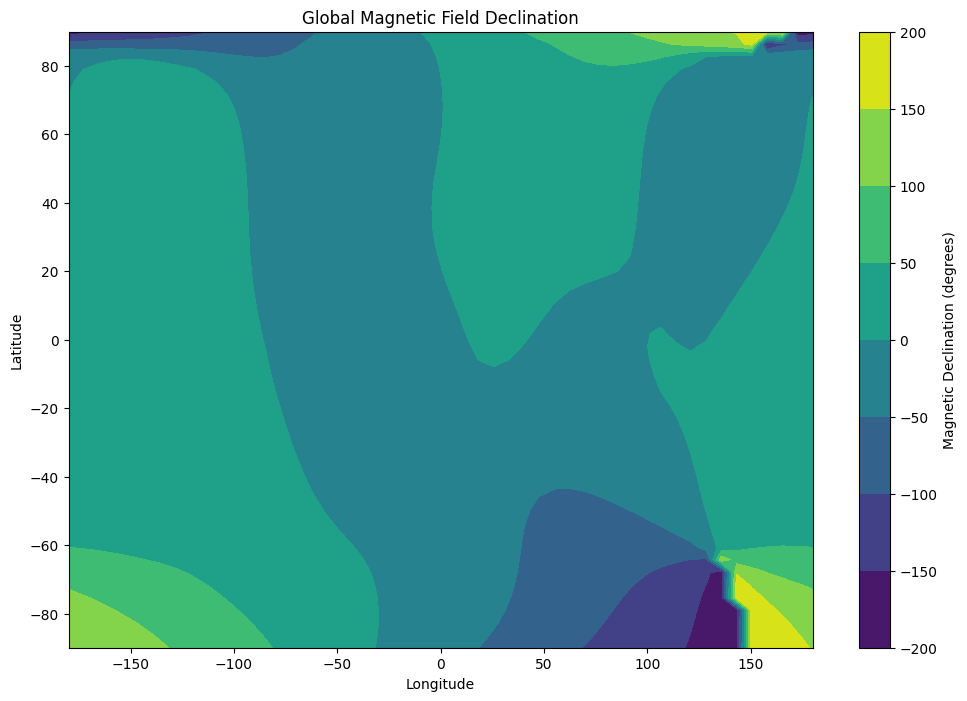

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# สร้างพิกัด Latitude และ Longitude
latitudes = np.linspace(-90, 90, 50)  # ลดจำนวนจุดเพื่อเพิ่มความเร็ว
longitudes = np.linspace(-180, 180, 50)

# สร้าง Meshgrid สำหรับ Simulation
latitude_grid, longitude_grid = np.meshgrid(latitudes, longitudes)
altitude = 0  # สมมติความสูง 0

# สร้างค่าสนามแม่เหล็ก
declination_grid = np.zeros_like(latitude_grid)

# คำนวณ Declination
for i in range(latitude_grid.shape[0]):
    for j in range(latitude_grid.shape[1]):
        mag = geomag.GeoMag()
        field = mag.GeoMag(latitude_grid[i, j], longitude_grid[i, j], altitude)
        declination_grid[i, j] = field.dec

# แสดงผลเป็นแผนที่สนามแม่เหล็ก
plt.figure(figsize=(12, 8))
plt.contourf(longitude_grid, latitude_grid, declination_grid, cmap='viridis')
plt.colorbar(label='Magnetic Declination (degrees)')
plt.title('Global Magnetic Field Declination')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


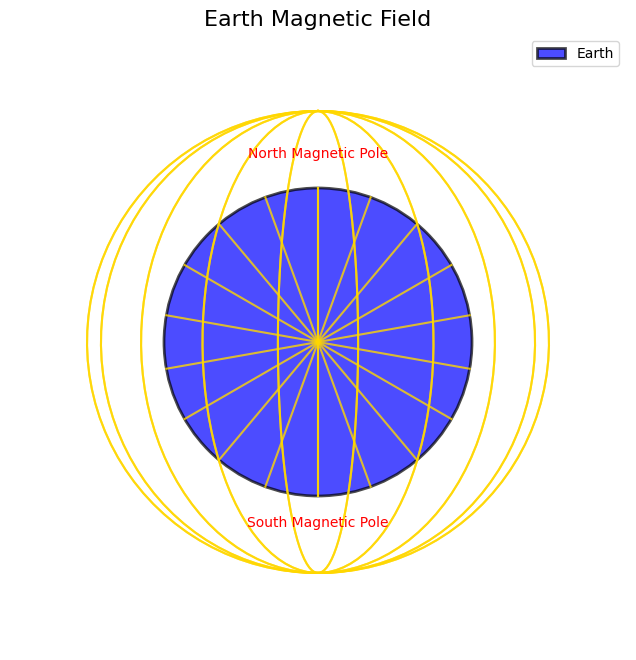

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ฟังก์ชันสำหรับวาดสนามแม่เหล็กแบบไดโพล
def plot_magnetic_field():
    # สร้าง figure
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # วาดโลก
    earth = plt.Circle((0, 0), 1, color='blue', ec='black', lw=2, alpha=0.7, label='Earth')
    ax.add_artist(earth)

    # สร้างข้อมูลสำหรับสนามแม่เหล็กแบบไดโพล
    theta = np.linspace(0, 2 * np.pi, 100)
    r = 1.5  # ระยะของเส้นสนามแม่เหล็กจากแกน
    for angle in np.linspace(0, np.pi, 10):  # สร้างเส้นสนาม 10 เส้น
        x = r * np.sin(theta) * np.cos(angle)
        y = r * np.cos(theta)
        ax.plot(x, y, color='gold', alpha=0.8)

    # วาดเส้นแม่เหล็กที่ผ่านขั้วโลกเหนือ-ใต้
    for angle in np.linspace(0, np.pi, 10):
        x = np.sin(angle)
        y = np.cos(angle)
        ax.plot([-x, x], [-y, y], color='gold', alpha=0.8)

    # ปรับแต่งแกนและใส่ชื่อ
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title('Earth Magnetic Field', fontsize=16)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.grid(False)
    ax.axis('off')

    # เพิ่มคำอธิบายสำหรับขั้วแม่เหล็ก
    ax.text(0, 1.2, 'North Magnetic Pole', fontsize=10, ha='center', color='red')
    ax.text(0, -1.2, 'South Magnetic Pole', fontsize=10, ha='center', color='red')

    # แสดงผลลัพธ์
    plt.legend()
    plt.show()

# เรียกใช้งานฟังก์ชัน
plot_magnetic_field()


# Future World Magnetic Field

In [ ]:
!pip install geomag

In [ ]:
import numpy as np

# ข้อมูลตัวแปร
V_s = 400  # ความเร็วลมสุริยะ (km/s)
theta = 45  # มุมทิศทางลมสุริยะ (องศา)
B_magnitude = 50  # สนามแม่เหล็กโลก (nT หรือหน่วย Tesla)
phi = 30  # มุมระหว่างสนามแม่เหล็กโลกและลมสุริยะ (องศา)

# คำนวณค่าของ B • V_s
cos_phi = np.cos(np.radians(theta - phi))
B_V_s = B_magnitude * V_s * cos_phi

# กำหนดระยะเวลาการคาดการณ์
# ตัวอย่าง: หากค่า B • V_s อยู่ระหว่าง 100 nT และ 200 nT จะเกิดพายุแม่เหล็ก
threshold_low = 100  # Lower threshold for geomagnetic storm (nT)
threshold_high = 200  # Upper threshold for geomagnetic storm (nT)

if B_V_s < threshold_low:
    print(f"ลมสุริยะมีผลน้อยต่อสนามแม่เหล็กโลก: {B_V_s:.2f} nT")
elif threshold_low <= B_V_s < threshold_high:
    print(f"ลมสุริยะส่งผลพอสมควรต่อสนามแม่เหล็กโลก: {B_V_s:.2f} nT")
    print("อาจมีการเกิดพายุแม่เหล็กเล็กน้อยในช่วงเวลานี้")
else:
    print(f"ลมสุริยะส่งผลมากต่อสนามแม่เหล็กโลก: {B_V_s:.2f} nT")
    print("อาจเกิดพายุแม่เหล็กโลกที่รุนแรง")

# ประมาณการรอบต่อไปที่ลมสุริยะจะส่งผล:
# คาดการณ์ระยะเวลาถัดไปด้วยความถี่ของลมสุริยะ
solar_cycle_period = 11  # Solar cycle period in years
approx_next_event_year = solar_cycle_period + 2024  # Assuming current year as 2024

print(f"When it gonna arrive us again? maybe in years : {approx_next_event_year}")


ลมสุริยะส่งผลมากต่อสนามแม่เหล็กโลก: 19318.52 nT
อาจเกิดพายุแม่เหล็กโลกที่รุนแรง
When it gonna arrive us again? maybe in years : 2035


In [ ]:
from geomag import geomag
import datetime

class FutureMagneticField:
    def __init__(self, dec, inc, ti):
        self.dec = dec
        self.inc = inc
        self.ti = ti

def calculate_future_magnetic_field(lat, lon, alt, year):
    mag = geomag.GeoMag()
    future_date = datetime.date(year, 1, 1)  # Create date object for the target year
    decimal_year = future_date.year + ((future_date - datetime.date(future_date.year, 1, 1)).days / 365.0)

    # Convert altitude to feet (if necessary):
    alt_feet = alt * 3.28084  # Conversion factor: 1 meter = 3.28084 feet

    return {
        "declination": field.dec,
        "total_intensity": field.ti,
    }


# Example usage:
latitude = 13.7563  # Latitude of Bangkok
longitude = 100.5018 # Longitude of Bangkok
altitude = 0  # Altitude in meters

future_year = 2035  # Change the year to 2035
future_field = calculate_future_magnetic_field(latitude, longitude, altitude, future_year)

print(f"Magnetic Field in {future_year} at ({latitude}, {longitude}):")
print(f"Declination (degrees): {future_field['declination']}")
print(f"Total Intensity (nT): {future_field['total_intensity']}")

Magnetic Field in 2035 at (13.7563, 100.5018):
Declination (degrees): -170.38329580363586
Total Intensity (nT): 56597.97075767047


# World Magnetic When Solar wind pass


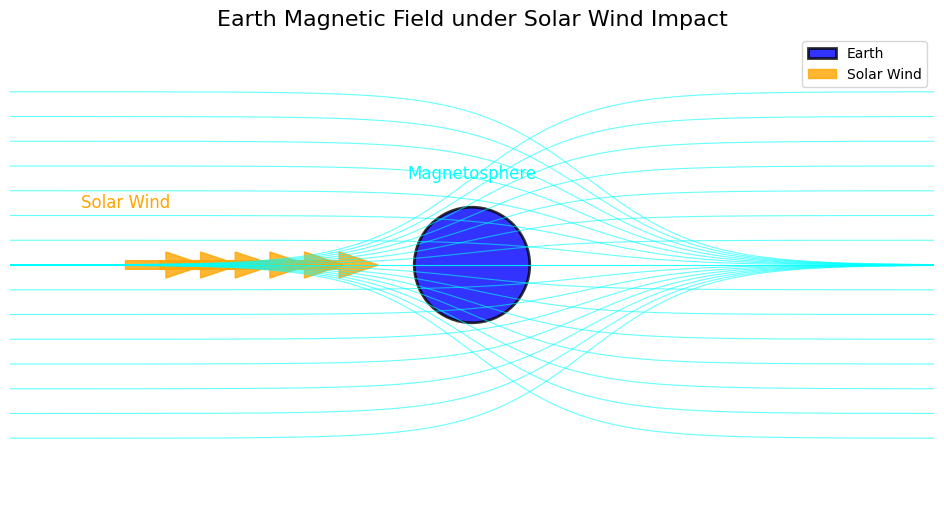

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# ฟังก์ชันจำลองสนามแม่เหล็กโลกเมื่อโดนลมสุริยะ
def plot_magnetic_field_under_solar_wind():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_aspect('equal')

    # วาดโลก
    earth = Circle((0, 0), 1, color='blue', ec='black', lw=2, alpha=0.8, label='Earth')
    ax.add_artist(earth)

    # สร้างสนามแม่เหล็กด้านหน้า (ถูกบีบอัดจากลมสุริยะ)
    x = np.linspace(-8, 8, 100)
    for i in np.linspace(-3, 3, 15):  # วาดหลายเส้น (15 เส้น)
        y_compressed = i / (1 + np.exp(-x))  # บีบเส้นทางด้านซ้าย
        ax.plot(x, y_compressed, color='cyan', lw=0.8, alpha=0.6)

    # สร้างสนามแม่เหล็กด้านหลัง (ยืดยาวออกไป)
    for i in np.linspace(-3, 3, 15):
        y_stretched = i / (1 + np.exp(x - 2))  # ยืดเส้นทางด้านขวา
        ax.plot(x, y_stretched, color='cyan', lw=0.8, alpha=0.6)

    # ลมสุริยะ (ลูกศรพัดจากซ้ายไปขวา)
    for offset in np.linspace(-6, -3, 6):  # ลูกศรแสดงแรงลมสุริยะ
        ax.arrow(offset, 0, 0.7, 0, color='orange', width=0.15, alpha=0.8, label='Solar Wind' if offset == -6 else "")

    # ตั้งค่าขอบเขตการแสดงผล
    ax.set_xlim(-8, 8)
    ax.set_ylim(-4, 4)
    ax.set_title('Earth Magnetic Field under Solar Wind Impact', fontsize=16)
    ax.axis('off')

    # เพิ่มคำอธิบาย
    ax.legend(loc='upper right', fontsize=10)
    ax.text(0, 1.5, 'Magnetosphere', fontsize=12, color='cyan', ha='center')
    ax.text(-6, 1, 'Solar Wind', fontsize=12, color='orange', ha='center')

    # แสดงผล
    plt.show()

# เรียกใช้งานฟังก์ชัน
plot_magnetic_field_under_solar_wind()


# Solar wind interaction with earth

Solar wind interaction with earth : solar_wind_interaction.mp4


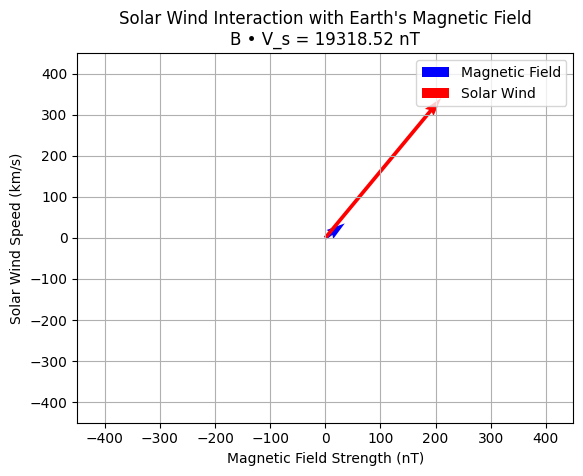

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ข้อมูลตัวแปร
V_s = 400  # ความเร็วลมสุริยะ (km/s)
theta = 45  # มุมทิศทางลมสุริยะ (องศา)
B_magnitude = 50  # สนามแม่เหล็กโลก (nT)
phi = 30  # มุมระหว่างสนามแม่เหล็กโลกและลมสุริยะ (องศา)

# คำนวณค่าของ B • V_s
cos_phi = np.cos(np.radians(theta - phi))
B_V_s = B_magnitude * V_s * cos_phi

# กำหนดช่วงเวลาเพื่อแสดงการเคลื่อนไหว
frames = 100
time = np.linspace(0, 2 * np.pi, frames)

# ฟังก์ชันสร้างแอนิเมชัน
def animate(frame):
    plt.clf()

    # แสดงกราฟทิศทางลมสุริยะและสนามแม่เหล็กโลก
    x_lm, y_lm = B_magnitude * np.cos(np.radians(theta)), B_magnitude * np.sin(np.radians(theta))
    x_w, y_w = V_s * np.cos(theta + frame), V_s * np.sin(theta + frame)

    # วาดเส้นกราฟ
    plt.quiver(0, 0, x_lm, y_lm, angles='xy', scale_units='xy', scale=1, color='b', label='Magnetic Field')
    plt.quiver(0, 0, x_w, y_w, angles='xy', scale_units='xy', scale=1, color='r', label='Solar Wind')

    plt.xlim(-450, 450)
    plt.ylim(-450, 450)
    plt.title(f"Solar Wind Interaction with Earth's Magnetic Field\nB • V_s = {B_V_s:.2f} nT")
    plt.xlabel("Magnetic Field Strength (nT)")
    plt.ylabel("Solar Wind Speed (km/s)")
    plt.grid(True)
    plt.legend()

ani = animation.FuncAnimation(plt.figure(), animate, frames=frames, interval=100, repeat=True)

ani.save('solar_wind_interaction.mp4', writer='ffmpeg', fps=10, extra_args=['-vcodec', 'libx264'])

print("Solar wind interaction with earth : solar_wind_interaction.mp4")


In [ ]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Video

# API URL จาก NASA OMNIWeb สำหรับข้อมูลลมสุริยะ
url = 'https://omniweb.gsfc.nasa.gov/cgi/nx1.cgi?frame=0&xm=01&composite=1&pd=0&buffer=60&nfft=256&wavfile=wh%2Fomni_hour%2Fomni_hour_1m.txt'

# ฟังก์ชันดึงข้อมูลลมสุริยะล่าสุดจาก OMNIWeb API
def get_solar_wind_data():
    response = requests.get(url, timeout=10)
    data = response.text.split('\n')
    # ดึงแค่บรรทัดล่าสุด
    latest_line = data[-2].split()

    # Check if the list has enough elements before accessing them
    if len(latest_line) >= 10: # We need at least 10 elements for 'speed', 'theta', and 'B_magnitude'
        return {
            'speed': float(latest_line[5]),  # ลมสุริยะความเร็ว (km/s)
            'theta': float(latest_line[9]),  # มุมทิศทางลมสุริยะ (องศา)
            'B_magnitude': float(latest_line[8])  # สนามแม่เหล็กโลก (nT)
        }
    else:
        print("Error: Data format from API is unexpected. The line has fewer elements than expected.")
        # You can choose to return default values or raise an exception here
        return {
            'speed': 0.0,
            'theta': 0.0,
            'B_magnitude': 0.0
        }
# ฟังก์ชันแอนิเมชัน
def animate(frame):
    plt.clf()

    # ดึงข้อมูลลมสุริยะล่าสุด
    solar_wind_data = get_solar_wind_data()

    V_s = solar_wind_data['speed']  # ความเร็วลมสุริยะ
    theta = solar_wind_data['theta']  # ทิศทางลมสุริยะ
    B_magnitude = solar_wind_data['B_magnitude']  # สนามแม่เหล็กโลก
    phi = 30  # มุมระหว่างลมสุริยะและสนามแม่เหล็กโลก (สมมติ)

    # คำนวณ B • V_s
    cos_phi = np.cos(np.radians(theta - phi))
    B_V_s = B_magnitude * V_s * cos_phi

    # วาดกราฟแอนิเมชัน
    x_lm, y_lm = B_magnitude * np.cos(np.radians(theta)), B_magnitude * np.sin(np.radians(theta))
    x_w, y_w = V_s * np.cos(theta), V_s * np.sin(theta)

    plt.quiver(0, 0, x_lm, y_lm, angles='xy', scale_units='xy', scale=1, color='b', label='Magnetic Field')
    plt.quiver(0, 0, x_w, y_w, angles='xy', scale_units='xy', scale=1, color='r', label='Solar Wind')

    plt.xlim(-450, 450)
    plt.ylim(-450, 450)
    plt.title(f"Solar Wind Interaction with Earth")


# Simulation


In [ ]:
!curl -s https://api.swpc.noaa.gov/json/planetary_k_index_1m.json


In [ ]:
!pip install requests


In [ ]:
!wget https://api.swpc.noaa.gov/json/planetary_k_index_1m.json


--2024-12-19 18:52:44--  https://api.swpc.noaa.gov/json/planetary_k_index_1m.json
Resolving api.swpc.noaa.gov (api.swpc.noaa.gov)... failed: Name or service not known.
wget: unable to resolve host address ‘api.swpc.noaa.gov’


In [ ]:
!export https_proxy=http://<proxy-url>:<port>
!export https_proxy=""


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `export https_proxy=http://<proxy-url>:<port>'


In [ ]:
!export https_proxy=http://your_proxy_address:port


In [ ]:
import requests

# API URL จาก NOAA สำหรับข้อมูลลมสุริยะ
url_noaa = 'https://services.swpc.noaa.gov/json/planetary_k_index_1m.json'

# ฟังก์ชันดึงข้อมูลลมสุริยะล่าสุดจาก NOAA API
def get_solar_wind_data_noaa():
    response = requests.get(url_noaa, timeout=10)
    data = response.json()  # แปลงข้อมูลเป็น JSON
    latest_data = data[-1]  # ดึงข้อมูลบรรทัดล่าสุด

    # พยายามดึงค่าจากข้อมูลล่าสุด
    try:
        speed = latest_data['wind_speed']  # ใช้ wind_speed แทน v
        theta = latest_data['phi']         # ใช้ phi
        B_magnitude = latest_data['B']     # ใช้ B
        return {
            'speed': speed,  # ความเร็วลมสุริยะ
            'theta': theta,  # ทิศทางลมสุริยะ
            'B_magnitude': B_magnitude  # สนามแม่เหล็กโลก
        }
    except KeyError as e:
        print(f"KeyError: {e} in NOAA data, data: {latest_data}")
        return None

# ฟังก์ชันแอนิเมชัน
def animate_noaa(frame):
    plt.clf()
    solar_wind_data = get_solar_wind_data_noaa()

    if solar_wind_data is None:
        return plt.gcf()

    V_s = solar_wind_data['speed']
    theta = solar_wind_data['theta']
    B_magnitude = solar_wind_data['B_magnitude']
    phi = 30

    cos_phi = np.cos(np.radians(theta - phi))
    B_V_s = B_magnitude * V_s * cos_phi if V_s is not None and theta is not None and B_magnitude is not None else None

    if B_V_s is not None:
        x_lm, y_lm = B_magnitude * np.cos(np.radians(theta)), B_magnitude * np.sin(np.radians(theta))
        x_w, y_w = V_s * np.cos(np.radians(theta)), V_s * np.sin(np.radians(theta))

        plt.quiver(0, 0, x_lm, y_lm, angles='xy', scale_units='xy', scale=1, color='b', label='Magnetic Field')
        plt.quiver(0, 0, x_w, y_w, angles='xy', scale_units='xy', scale=1, color='r', label='Solar Wind')

        plt.xlim(-450, 450)
        plt.ylim(-450, 450)
        plt.title(f"Solar Wind Interaction with Earth's Magnetic Field\nB • V_s = {B_V_s:.2f} nT")
        plt.xlabel("Magnetic Field Strength (nT)")
        plt.ylabel("Solar Wind Speed (km/s)")
        plt.grid(True)
        plt.legend()

    return plt.gcf()

# สร้างแอนิเมชันใน Colab
ani = animation.FuncAnimation(plt.figure(), animate_noaa, frames=100, interval=5000, repeat=True)

# บันทึกแอนิเมชันเป็นไฟล์วิดีโอใน Colab
ani.save('solar_wind_interaction_noaa.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

# แสดงวิดีโอใน Colab
Video('solar_wind_interaction_noaa.mp4', width=720, height=480)


KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}
KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}
KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}
KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}
KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}
KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}
KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}
KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated

KeyError: 'wind_speed' in NOAA data, data: {'time_tag': '2024-12-19T18:50:00', 'kp_index': 0, 'estimated_kp': 0.33, 'kp': '0P'}


<Figure size 640x480 with 0 Axes>

# S2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# ฟังก์ชันจำลองค่าสนามแม่เหล็กโลก
def generate_magnetic_field_data():
    # พื้นที่จำลองพิกัดสนามแม่เหล็ก
    x = np.linspace(-5, 5, 30)
    y = np.linspace(-5, 5, 30)
    z = np.linspace(-5, 5, 30)
    X, Y, Z = np.meshgrid(x, y, z)

    # คำนวณสนามแม่เหล็กใน 3D (สมมุติค่าบางส่วน)
    Bx = -X / (np.sqrt(X**2 + Y**2 + Z**2) + 1e-5)
    By = -Y / (np.sqrt(X**2 + Y**2 + Z**2) + 1e-5)
    Bz = Z / (np.sqrt(X**2 + Y**2 + Z**2) + 1e-5)

    # Return ข้อมูล
    return X, Y, Z, Bx, By, Bz

# ฟังก์ชันสร้างลมสุริยะ
def generate_solar_wind_data():
    x = np.linspace(-5, 5, 30)
    z = np.linspace(-5, 5, 30)
    X, Z = np.meshgrid(x, z)

    # ความเร็วลมสุริยะในทิศทาง x (สมมติค่า)
    wind_speed = np.exp(-((X-2)**2 + Z**2)) * 3

    return X, Z, wind_speed

# ฟังก์ชันสร้างภาพแบบ 3D ด้วย Plotly
def plot_3d_magnetic_field_with_solar_wind():
    # ข้อมูลสนามแม่เหล็ก
    X, Y, Z, Bx, By, Bz = generate_magnetic_field_data()

    # ข้อมูลลมสุริยะ
    X_wind, Z_wind, wind_speed = generate_solar_wind_data()

    # สร้างภาพ Plotly
    fig = go.Figure()

    # เพิ่มสนามแม่เหล็กเป็นเวกเตอร์ 3D
    fig.add_trace(go.Cone(
        x=X.flatten(),
        y=Y.flatten(),
        z=Z.flatten(),
        u=Bx.flatten(),
        v=By.flatten(),
        w=Bz.flatten(),
        colorscale='Viridis',
        sizemode='scaled',
        sizeref=0.5,
        anchor='tail',
        name='Magnetic Field'
    ))

    # เพิ่มลมสุริยะ
    fig.add_trace(go.Surface(
        z=Z_wind,
        x=X_wind,
        y=wind_speed,
        colorscale='Oranges',
        opacity=0.8,
        name='Solar Wind'
    ))

    # เพิ่มทรงกลมแสดงโลก
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    fig.add_trace(go.Surface(
        x=x_sphere,
        y=y_sphere,
        z=z_sphere,
        colorscale='Blues',
        opacity=0.6,
        name='Earth'
    ))

    # ตั้งค่าการแสดงผล
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),
        title='3D Magnetic Field and Solar Wind Simulation'
    )

    fig.show()

plot_3d_magnetic_field_with_solar_wind()
